## plot model correlation with data

In [30]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
def plot_bins(df,sj_idx=None,cut_num=10,model=None):
    """bin average then correlate"""
    fig, ax = plt.subplots(figsize=(4,4))
    all_sj = np.unique(df['subject'])
    if sj_idx is not None:
        sj_ls = all_sj[sj_idx]
    else:
        sj_ls = all_sj
    n_sj = len(sj_ls)
    r_sj = np.empty((n_sj,))
    model_sj = np.empty((n_sj, cut_num))
    rate_sj = np.empty((n_sj, cut_num))



#     for idx, sj in enumerate(np.unique(df['subject'])):
    for idx, sj in enumerate(sj_ls):
        df_sj = df[df['subject']==sj]
        df_tmp = df_sj.dropna(subset=['p1'])
        model_rank = df_tmp['pmod'].rank(method='max')
        model_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['pmod'].mean().values
        rate_cut = df_tmp.groupby(pd.qcut(model_rank, cut_num))['p1'].mean().values
        nas = np.logical_and(np.isnan(model_cut), np.isnan(rate_cut)) # get rid of nans
        # demean
#         mc_dm = demean(model_cut[~nas])
#         rc_dm = demean(rate_cut[~nas])
#         pr, pv = scipy.stats.pearsonr(mc_dm, rc_dm)
#         sns.regplot(x=mc_dm, y=rc_dm)
        # no demean
#         print(f'subject %d, pearsonr %.3f, pval %.3f' %(sj, pr, pv))
        pr, pv = scipy.stats.pearsonr(model_cut[~nas], rate_cut[~nas])
        sns.regplot(x=model_cut[~nas], y=rate_cut[~nas])      
        
        r_sj[idx] = pr
        model_sj[idx,:] = model_cut
        rate_sj[idx,:] = rate_cut


    ax.set_aspect('equal')#, adjustable='box')
    plt.plot([0,1],[0,1], 'k-')
#     plt.xlim(-2.2,2.2)
#     plt.ylim(-2.2,2.2)
    # plt.xlim(0.,1)
    # plt.ylim(0.,1)
    plt.xlabel('Bayes-optimal model probability')
    plt.ylabel('Participant rated probability')
    t0, p0 = scipy.stats.ttest_rel(r_sj,np.zeros((n_sj,)))
    plt.title(f'Pearson r={np.mean(r_sj):.3f} (t({len(r_sj)})={t0:.3f}, p={p0:.3e})')
    if model is not None:
        fig_name = f'bins_{model:s}.pdf'
        fig_path = os.path.join('figs',fig_name)
        plt.savefig(fig_path, bbox_inches='tight')

def demean(df):
    """demean"""
    df_dm = (df-np.mean(df))/np.std(df)
    return df_dm

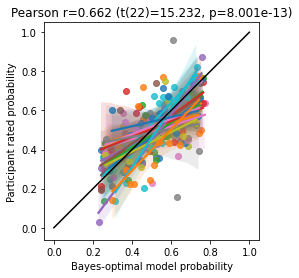

In [170]:
df = pd.read_csv('./output/fmri_io_jump_freq.csv')
io_idx = [0, 1, 2, 3, 4, 5, 8, 10, 12, 14, 15, 17, 18, 21, 23, 26, 29, 30,
            31, 32, 33, 34]
plot_bins(df, sj_idx=io_idx,model='fmri_io_jump_freq_subset')

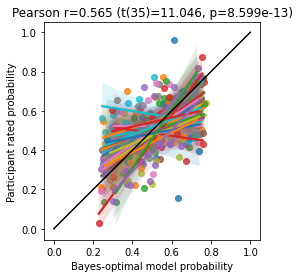

In [171]:
df = pd.read_csv('./output/fmri_io_jump_freq.csv')
plot_bins(df,model='fmri_io_jump_freq_all')

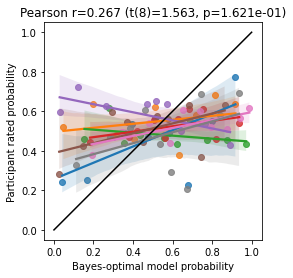

In [174]:
df = pd.read_csv('./output/fmri_rw.csv')
plot_bins(df, sj_idx=[6, 11, 13, 16, 19, 20, 22, 28], model='fmri_rw_subset')

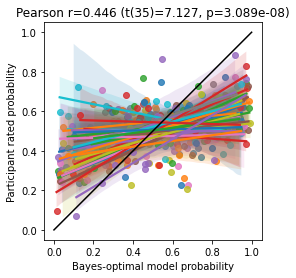

In [173]:
df = pd.read_csv('./output/fmri_rw.csv')
plot_bins(df,model='fmri_rw_all')

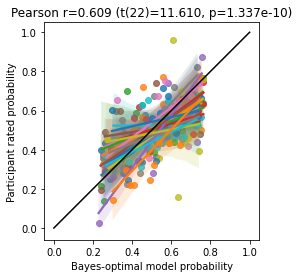

In [181]:
df = pd.read_csv('./output/fmri_io_jump_freq.csv')
plot_bins(df,sj_idx=[ 0,  1,  2,  3,  6,  9, 12, 14, 15, 16, 18, 20, 21, 22, 23, 26, 27,
            28, 30, 31, 33, 34],model='fmri_io_jump_freq_rtsubset')

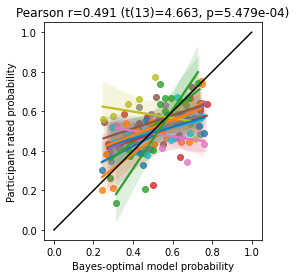

In [183]:
df = pd.read_csv('./output/fmri_io_jump_freq.csv')
plot_bins(df,sj_idx=[4, 5, 7, 8, 10, 11, 13, 17, 19, 24, 25, 29, 32]) # rt subset, prob subset [6, 11, 13, 16, 19, 20, 22, 28]

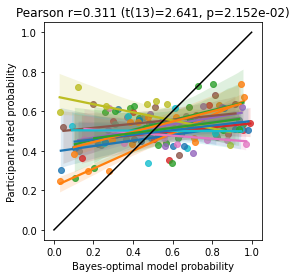

In [179]:
df = pd.read_csv('./output/fmri_rw.csv')
plot_bins(df,sj_idx=[4, 5, 7, 8, 10, 11, 13, 17, 19, 24, 25, 29, 32],model='fmri_rw_rtsubset') # rt subset

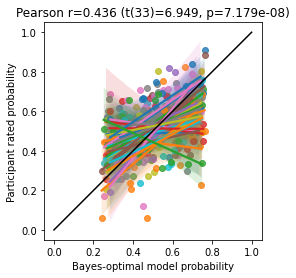

In [175]:
df = pd.read_csv('./output/practice_io_jump_freq.csv')
plot_bins(df,model='practice_io_jump_freq_all')

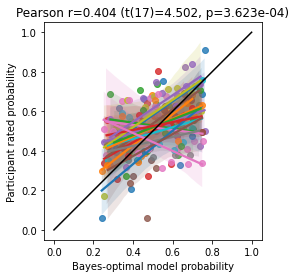

In [176]:
df = pd.read_csv('./output/practice_io_jump_freq.csv')
plot_bins(df, sj_idx=[0, 5, 6, 9, 11, 12, 13, 15, 16, 19, 21, 22, 27, 28, 30, 31, 32],model='practice_io_jump_freq_subset')

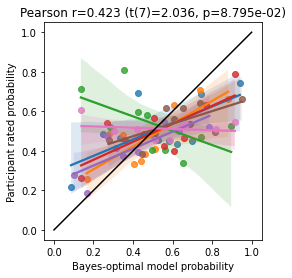

In [178]:
df = pd.read_csv('./output/practice_rw.csv')
plot_bins(df,sj_idx=[3, 4, 7, 8, 18, 20, 23],model='practice_rw_subset')

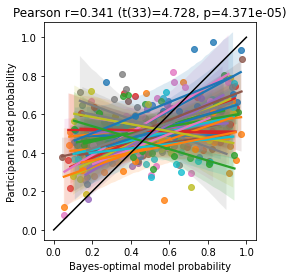

In [177]:
df = pd.read_csv('./output/practice_rw.csv')
plot_bins(df,model='practice_rw_all')